In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

table_MN = pd.read_html('https://www.infoplease.com/world/population/population-density-square-mile-countries')
df = table_MN[0]

In [166]:
df1 = df[['Country','Population','Land area (sq mi)','Density per sq mi']]
df2 = df[['Country.1','Population.1','Land area (sq mi).1','Density per sq mi.1']]
df2 = df2.rename({'Country.1': 'Country', 
                  'Population.1': 'Population', 
                  'Land area (sq mi).1': 'Land area (sq mi)', 
                  'Density per sq mi.1': 'Density per sq mi'}, axis='columns')
df2.index += 114 

In [167]:
df_popdens = pd.concat([df1, df2])
df_popdens[112:116]
df_popdens = df_popdens.set_index("Country")

In [168]:
df_popdens.sort_values(['Density per sq mi'], ascending=False).head(1)

,Population,Land area (sq mi),Density per sq mi
Country,,,
Macau S.A.R.,453125,6.0,73350.0


<AxesSubplot:>

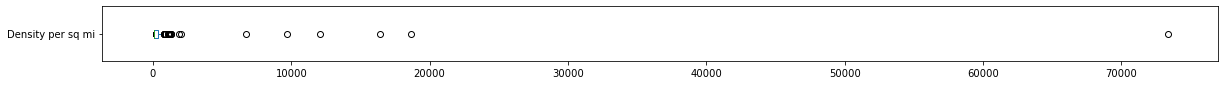

In [169]:
df_popdens['Density per sq mi'].plot(kind='box', vert=False, figsize=(20,1))

In [170]:
df4 = df_popdens[(np.abs(stats.zscore(df3['Density per sq mi'])) < 3)]

<AxesSubplot:>

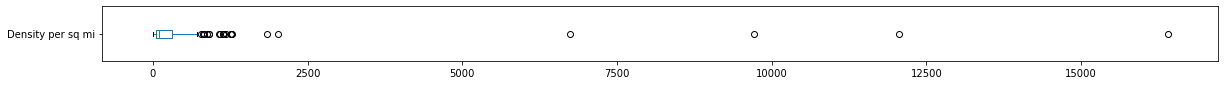

In [182]:
df4['Density per sq mi'].plot(kind='box', vert=False, figsize=(20,1))

Text(0, 0.5, 'Flights')

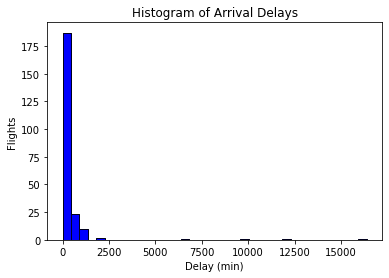

In [180]:
# matplotlib histogram
plt.hist(df4['Density per sq mi'], color = 'blue', edgecolor = 'black', bins = int(180/5))

# seaborn histogram
sns.distplot(df4['Density per sq mi'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [173]:
df_corona = pd.read_excel("corona_stats.xls")
df_corona = df_corona.rename(
    columns={
        'Country,': 'Country',
        'Total': 'TotCases',
        'New': 'NewCases',
        'Total.1': 'TotDeaths',
        'New.1': 'NewDeaths',
        'Total.2': 'TotalRecovered',
        'Active': 'ActiveCases',
        'Serious,': 'SeriousCases',
        'TotCases': 'CasesPer1MPop',
        'Deaths/': 'DeathsPer1MPop',
        'Total.3': 'TotTests',
        'Tests/': 'TestsPer1MPop',
        'Population': 'Population'
    })
df_corona = df_corona.shift(-1)
df_corona = df_corona.drop('Unnamed: 0', 1)
df_corona = df_corona.set_index("Country")
df_corona.head(2)

,TotCases,NewCases,TotDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCases,CasesPer1MPop,DeathsPer1MPop,TotTests,TestsPer1MPop,Population
Country,,,,,,,,,,,,
World,"149,637,489",310.999,"3,153,202",4.987,"127,719,954","18,764,333",111.144,19.197,404.5,NaN,NaN,NaN
USA,"32,928,354",1.263,587.406,22,"25,521,931","6,819,017",9.866,99.004,1.766,"442,238,982","1,329,660","332,595,570"


In [174]:
df = pd.merge(df_popdens, df_corona, left_index=True, right_index=True)

In [175]:
df.head(3)
df=df[(np.abs(stats.zscore(df['Density per sq mi'])) < 3)]

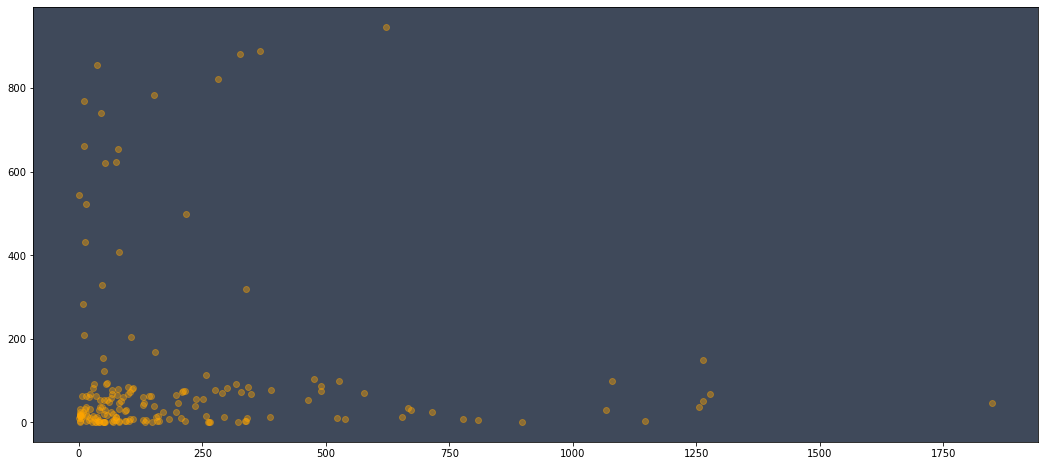

In [176]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(df['Density per sq mi'], df['CasesPer1MPop'], color='orange', alpha =0.4)
ax.set_facecolor("#3F495A")

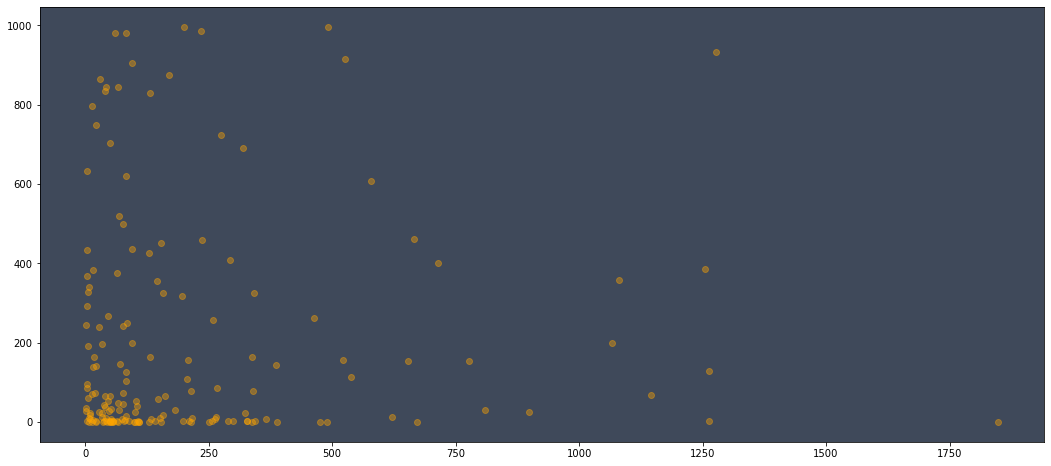

In [177]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(df['Density per sq mi'], df['DeathsPer1MPop'], color='orange', alpha =0.4)
ax.set_facecolor("#3F495A")